In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../data/Steel_industry_data.csv')
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  
np.set_printoptions(linewidth=1000)
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [2]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data.sort_values(by='date', inplace=True)

data['day'] = data['date'].dt.weekday
data['month'] = data['date'].dt.month
data['time'] = data['date'].dt.time
data = data.drop(columns=['date', 'WeekStatus', 'Day_of_week'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 95 to 35038
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   Load_Type                             35040 non-null  object 
 8   day                                   35040 non-null  int32  
 9   month                                 35040 non-null  int32  
 10  time                                  35040 non-null  object 
dtypes: float64(6), int3

In [3]:
data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,day,month,time
95,3.42,3.46,0.0,0.0,70.30,100.0,0,Light_Load,0,1,00:00:00
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load,0,1,00:15:00
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load,0,1,00:30:00
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load,0,1,00:45:00
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load,0,1,01:00:00


In [4]:
data['TimeStamp'] = data['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
data = data.drop(columns=['time'])
data.head()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,day,month,TimeStamp
95,3.42,3.46,0.0,0.0,70.30,100.0,0,Light_Load,0,1,0
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load,0,1,900
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load,0,1,1800
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load,0,1,2700
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load,0,1,3600


In [5]:
from sklearn.preprocessing import LabelEncoder
from lab3.rnn import split

scaler = StandardScaler()
numeric_features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'TimeStamp']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

label_encoder = LabelEncoder()
data['Load_Type'] = label_encoder.fit_transform(data['Load_Type'])

data.info()

x = data.drop(columns='Load_Type').values
y = pd.get_dummies(data['Load_Type']).values

seq_len = 7
X_seq = []
Y_seq = []

for i in range(len(x) - seq_len):
    X_seq.append(x[i:i + seq_len])
    Y_seq.append(y[i + seq_len])

X_seq = np.array(X_seq)
Y_seq = np.array(Y_seq)

x_train, x_test, y_train, y_test = split(X_seq, Y_seq, test_size=0.1, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 95 to 35038
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  float64
 7   Load_Type                             35040 non-null  int32  
 8   day                                   35040 non-null  int32  
 9   month                                 35040 non-null  int32  
 10  TimeStamp                             35040 non-null  float64
dtypes: float64(8), int3

In [6]:
from lab3.rnn import RNN, DenseLay, CategoricalCrossEntropy, Model

sequence_length = 4
learning_rate = 0.03
epochs = 10

model = Model(CategoricalCrossEntropy(), learning_rate=learning_rate, epochs=epochs)
model.add_lay(RNN(input_size=x_test.shape[-1], output_size=24, return_sequence=True, activation='relu'))
model.add_lay(RNN(input_size=24, output_size=10, return_sequence=False, activation='relu'))
model.add_lay(DenseLay(10, 3, activation='softmax'))

model.train(x_train, y_train,learning_rate=learning_rate)

y_pred = model.predict(x_test)

F1: 0.7283650908035172
Class 0              Precision:0.9973     Recall:0.8317    
Class 1              Precision:0.6075     Recall:0.7729    
Class 2              Precision:0.5744     Recall:0.6231    


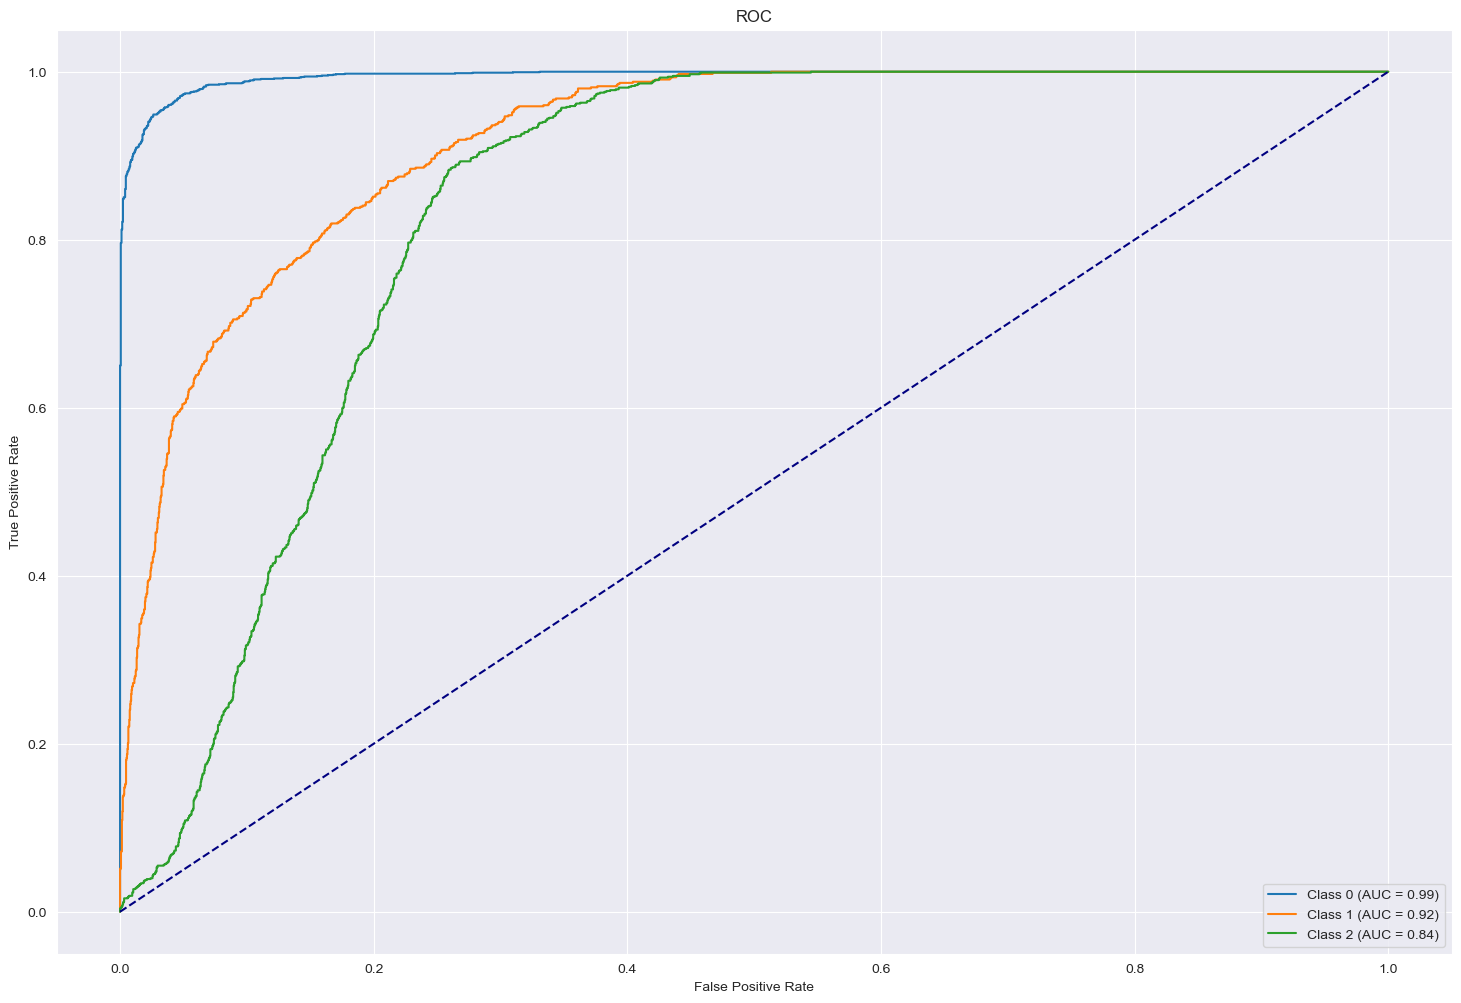

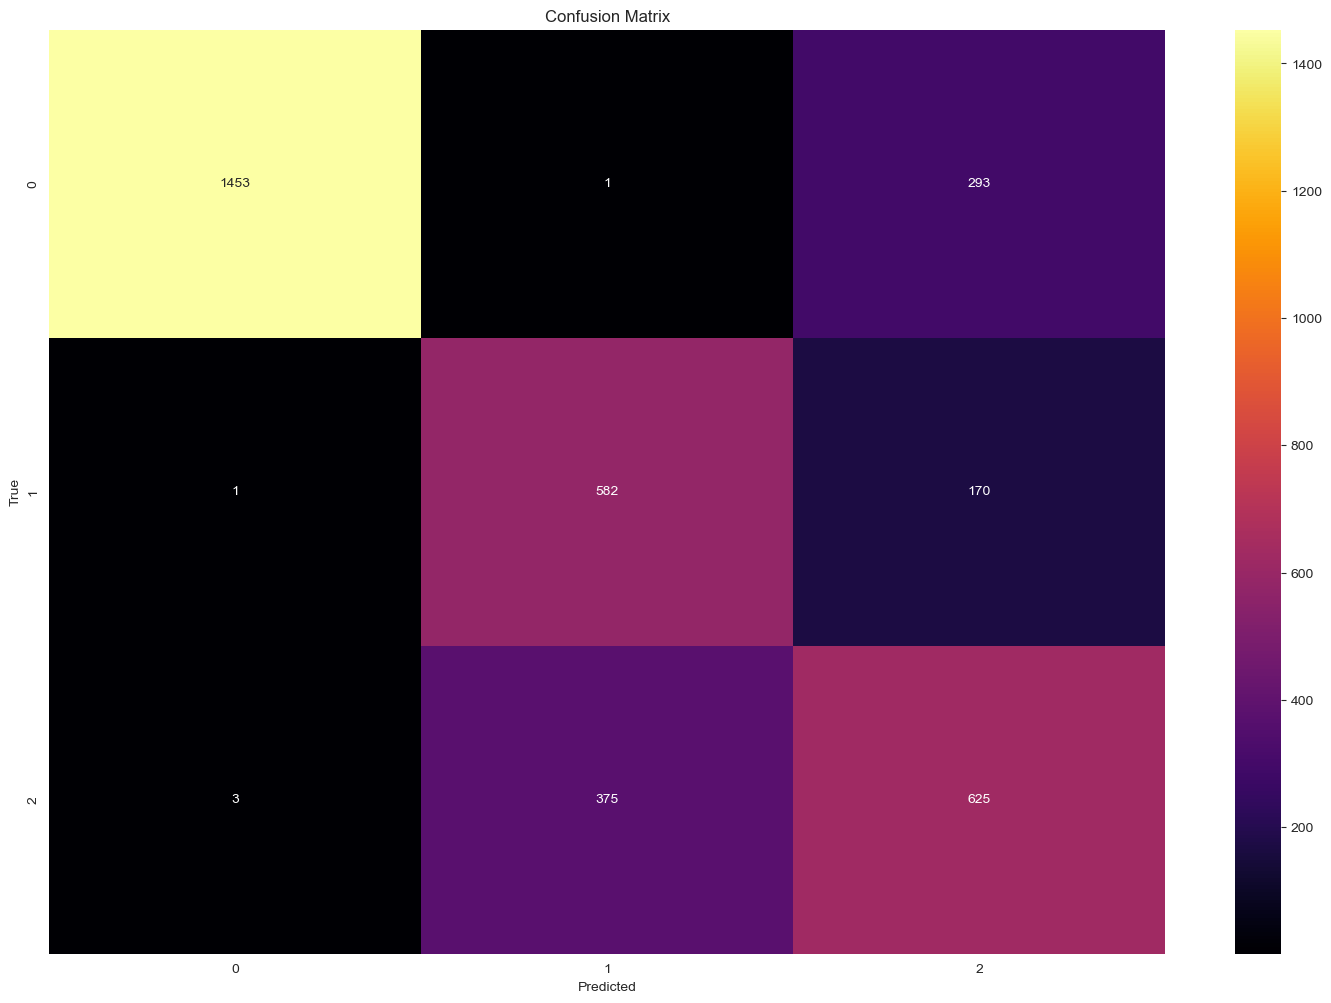

In [7]:
from lab3.rnn import precision_recall,  auc, roc, F1
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

f1_score = F1(y_test, y_pred)
print(f"F1: {f1_score}")

precisions, recalls = precision_recall(y_test, y_pred)
target_names = [f'Class {i}' for i in range(len(precisions))]
for i, class_name in enumerate(target_names):
    print("{:<20} Precision:{:<10.4f} Recall:{:<10.4f}".format(class_name, precisions[i], recalls[i]))

num_classes = y_test.shape[1]
all_fpr = []
all_tpr = []

plt.figure(figsize=(18, 12))
for class_index in range(num_classes):
    fpr, tpr = roc(y_test[:, class_index], y_pred[:, class_index])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_index, roc_auc))
    interpolated_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)
    all_fpr.append(np.linspace(0, 1, 100))
    all_tpr.append(interpolated_tpr)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


def predictions_to_labels(predictions):
    return predictions.argmax(axis=1)


y_pred = predictions_to_labels(y_pred)
y_true = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
from lab3.rnn import LSTM

learning_rate = 0.03
epochs = 10

model = Model(CategoricalCrossEntropy(), learning_rate=learning_rate, epochs=epochs)
model.add_lay(LSTM(input_size=x_train.shape[-1], output_size=24, return_sequence=True, activation='relu'))
model.add_lay(LSTM(input_size=24, output_size=16, return_sequence=False, activation='relu'))
model.add_lay(DenseLay(16, 3, activation='softmax'))
model.train(x_train, y_train, learning_rate=learning_rate)

y_pred = model.predict(x_test)



F1: 0.7251985085643263
Class 0              Precision:0.8933     Recall:0.9828    
Class 1              Precision:0.7129     Recall:0.4714    
Class 2              Precision:0.6473     Recall:0.6989    


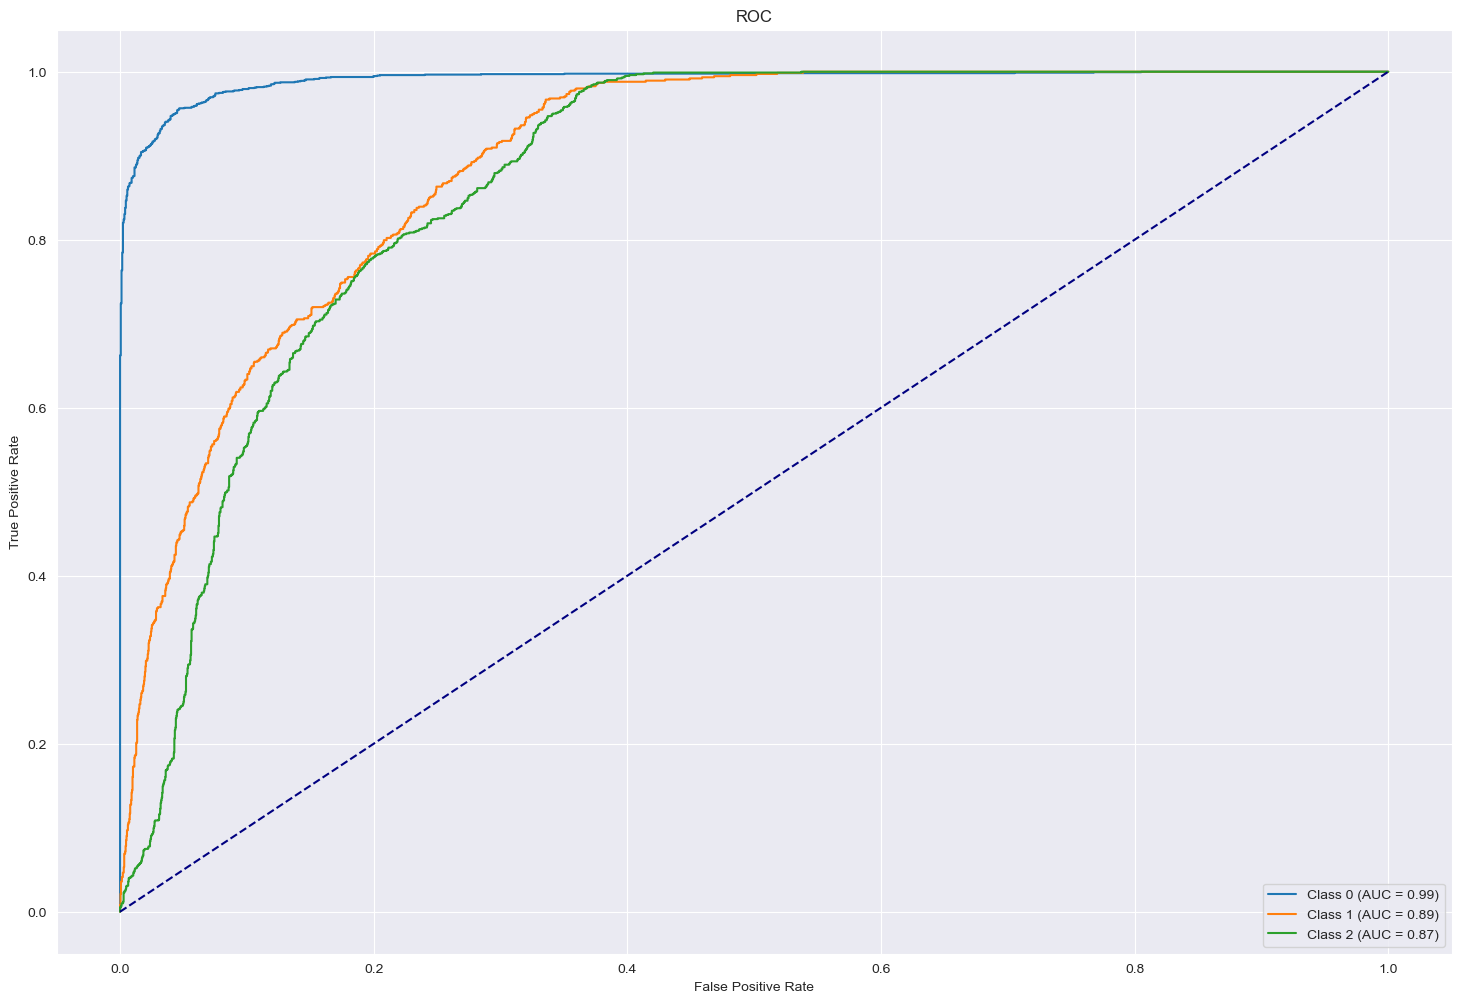

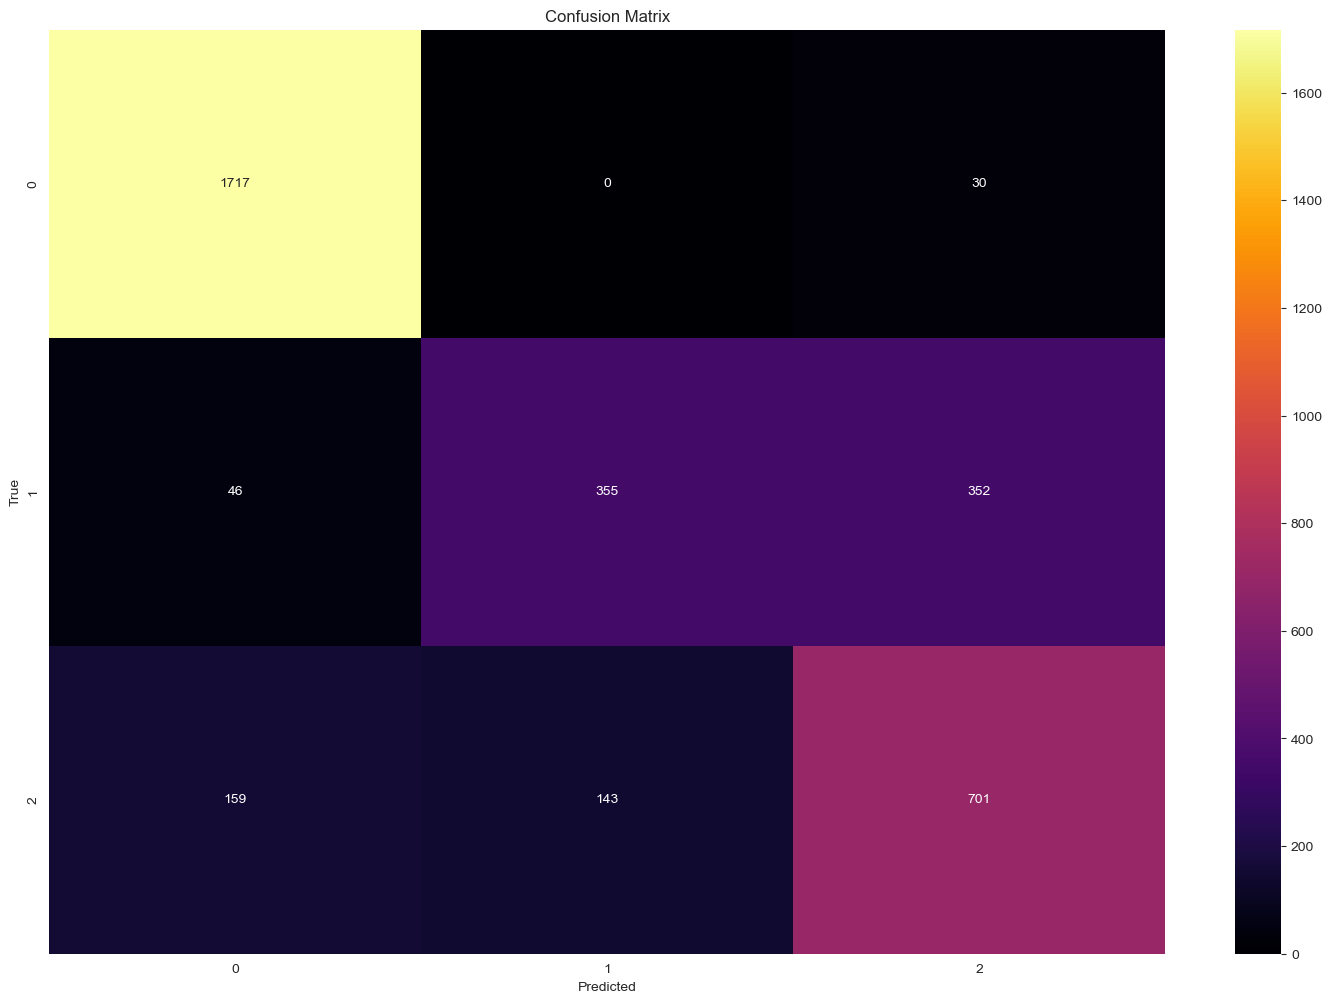

In [9]:
from lab3.rnn import precision_recall, auc, roc
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

f1_score = F1(y_test, y_pred)
print(f"F1: {f1_score}")

precisions, recalls = precision_recall(y_test, y_pred)
target_names = [f'Class {i}' for i in range(len(precisions))]
for i, class_name in enumerate(target_names):
    print("{:<20} Precision:{:<10.4f} Recall:{:<10.4f}".format(class_name, precisions[i], recalls[i]))


num_classes = y_test.shape[1]
all_fpr = []
all_tpr = []

plt.figure(figsize=(18, 12))
for class_index in range(num_classes):
    fpr, tpr = roc(y_test[:, class_index], y_pred[:, class_index])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_index, roc_auc))
    interpolated_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)
    all_fpr.append(np.linspace(0, 1, 100))
    all_tpr.append(interpolated_tpr)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


def predictions_to_labels(predictions):
    return predictions.argmax(axis=1)


y_pred = predictions_to_labels(y_pred)
y_true = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from lab3.rnn import GRU

learning_rate = 0.03
epochs = 10

model = Model(CategoricalCrossEntropy(), learning_rate=learning_rate, epochs=epochs)
model.add_lay(GRU(input_size=x_train.shape[-1],output_size=32, return_sequence=True, activation='relu'))
model.add_lay(GRU(input_size=32, output_size=12, return_sequence=False, activation='relu'))
model.add_lay(DenseLay(12, 3, activation='softmax'))
model.train(x_train, y_train, learning_rate=learning_rate)

y_pred = model.predict(x_test)

F1: 0.7771909713887292
Class 0              Precision:0.9427     Recall:0.9891    
Class 1              Precision:0.8621     Recall:0.4648    
Class 2              Precision:0.6835     Recall:0.8614    


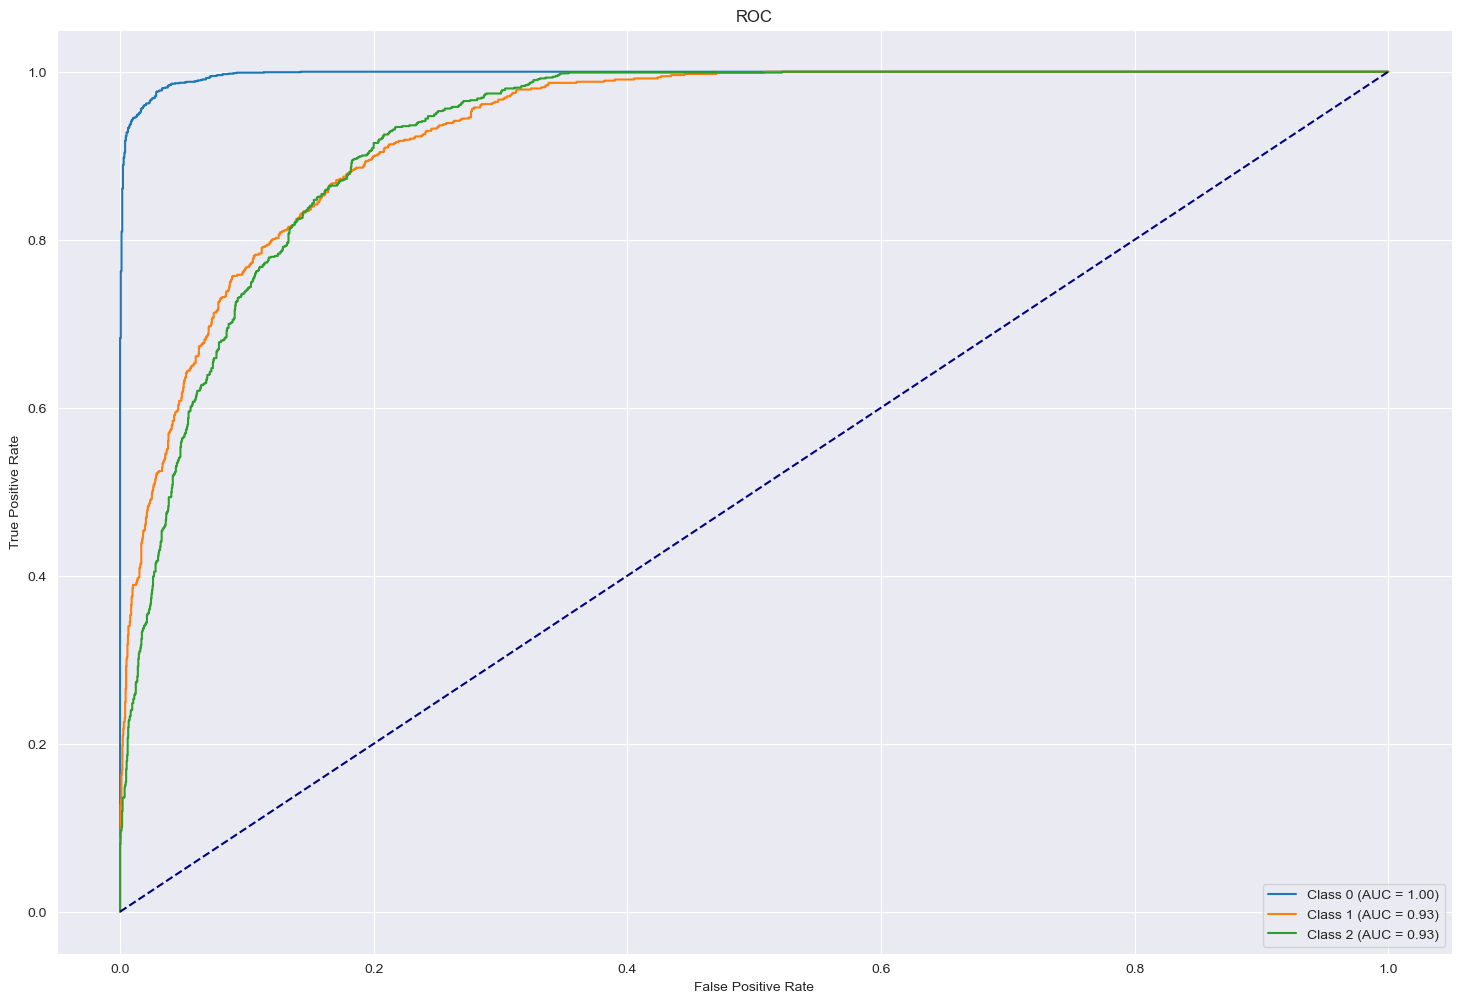

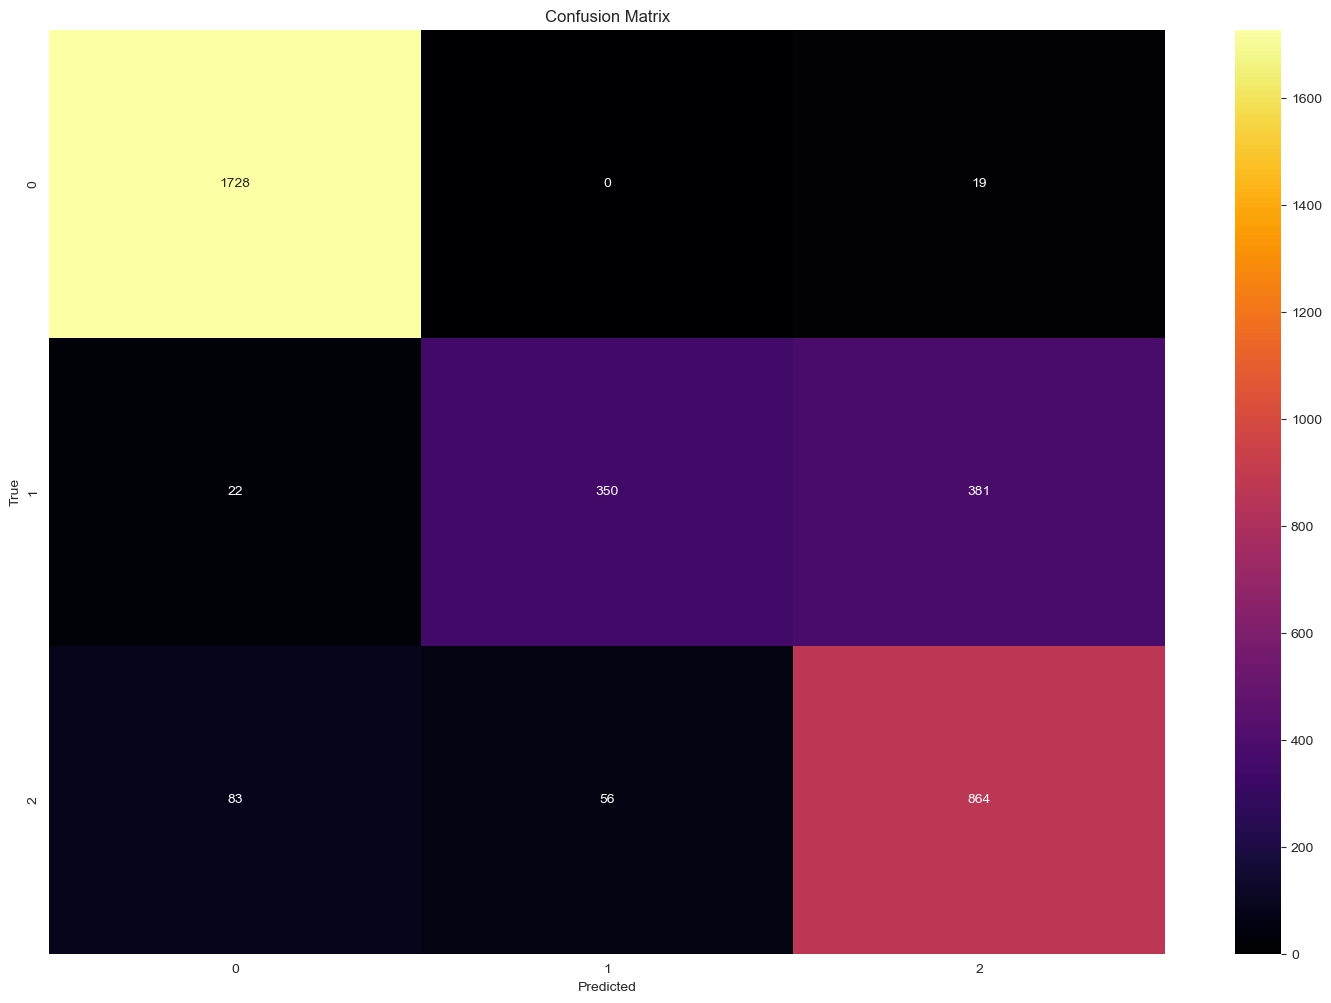

In [11]:
from lab3.rnn import precision_recall, auc, roc
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

f1_score = F1(y_test, y_pred)
print(f"F1: {f1_score}")

precisions, recalls = precision_recall(y_test, y_pred)
target_names = [f'Class {i}' for i in range(len(precisions))]
for i, class_name in enumerate(target_names):
    print("{:<20} Precision:{:<10.4f} Recall:{:<10.4f}".format(class_name, precisions[i], recalls[i]))


num_classes = y_test.shape[1]
all_fpr = []
all_tpr = []

plt.figure(figsize=(18, 12))
for class_index in range(num_classes):
    fpr, tpr = roc(y_test[:, class_index], y_pred[:, class_index])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_index, roc_auc))
    interpolated_tpr = np.interp(np.linspace(0, 1, 100), fpr, tpr)
    all_fpr.append(np.linspace(0, 1, 100))
    all_tpr.append(interpolated_tpr)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


def predictions_to_labels(predictions):
    return predictions.argmax(axis=1)


y_pred = predictions_to_labels(y_pred)
y_true = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()